# 0- Initialisation

In [67]:
# Librairies pour le traitement des données
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *
from my_functions.pca_functions import *

%matplotlib inline

low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

In [68]:
# Chargement des Data Sets
df15 = pd.read_csv('2015-building-energy-benchmarking.csv', low_memory=low_memory)
df16 = pd.read_csv('2016-building-energy-benchmarking.csv', low_memory=low_memory)

Le data set contient :
	- 3340 lignes et 47 colonnes.
	- 26512 valeurs manquantes, ce qui représente 16.89 % du data set.
Voici un sous-échantillon aléatoire :


OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
3308          49945      2015        NonResidential  Senior Care Community   
1661          22954      2015  Multifamily LR (1-4)   Low-Rise Multifamily   

                    PropertyName TaxParcelIdentificationNumber  \
3308  PUBLIC MARKET SOUTH GARAGE                    6598350000   
1661               CITIGATE APTS                    2926049050   

                                               Location  CouncilDistrictCode  \
3308  {'latitude': '47.60895084', 'longitude': '-122...                    7   
1661  {'latitude': '47.71119967', 'longitude': '-122...                    5   

     Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
3308     DOWNTOWN       1989                  1             3.0   
1661        NORTH       1987                  1             3.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3308            167300                   0                  167300   
1661            112424               15123                   97301   

                              ListOfAllPropertyUseTypes  \
3308  Office, Other - Public Services, Personal Serv...   
1661                       Multifamily Housing, Parking   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3308  Senior Care Community                    38800.0   
1661    Multifamily Housing                    82706.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3308      Other - Public Services                           3650.0   
1661                      Parking                           1500.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3308                      Office                           586.0   
1661                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3308                      NaN              NaN              84.4   
1661                      NaN             93.0              27.9   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
3308                87.9               218.5                 218.5   
1661                30.0                87.4                  94.1   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3308            3681105.0              3833436.0             0.0   
1661            2303386.0              2478413.0             0.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
3308          794803.0          2711979.0              9692.0   
1661          675084.0          2303481.0                 0.0   

      NaturalGas(kBtu)  OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
3308          969239.0                 0.0                         70.38   
1661               0.0                 0.0                         16.06   

      GHGEmissionsIntensity(kgCO2e/ft2) DefaultData Comment ComplianceStatus  \
3308                               0.35          No     NaN        Compliant   
1661                               0.05          No     NaN        Compliant   

     Outlier  2010 Census Tracts  \
3308     NaN                 NaN   
1661     NaN                 NaN   

      Seattle Police Department Micro Community Policing Plan Areas  \
3308                                               14.0               
1661                                               46.0               

      City Council Districts  SPD Beats  Zip Codes  
3308                     NaN       30.0      18081  
1661                     NaN       28.0      19579

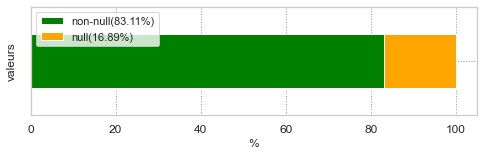

In [69]:
# Vérification de la structure du Data Set
verifier_taille(df15)
afficher_echantillon(df15)

Le data set contient :
	- 3376 lignes et 46 colonnes.
	- 19952 valeurs manquantes, ce qui représente 12.85 % du data set.
Voici un sous-échantillon aléatoire :


OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
1675          23076      2016        NonResidential      Worship Facility   
3145          42070      2016  Multifamily LR (1-4)  Low-Rise Multifamily   

                       PropertyName                           Address  \
1675  North Seattle Alliance Church              2150 N. 122nd Street   
3145                 Tamarack Place  4616 Martin Luther King Jr Way S   

         City State  ZipCode TaxParcelIdentificationNumber  \
1675  Seattle    WA  98133.0                    3034200285   
3145  Seattle    WA  98108.0                    8562990000   

      CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
1675                    5    NORTHWEST  47.71745 -122.33221       1965   
3145                    2    SOUTHEAST  47.56185 -122.29363       2010   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1675                1.0               2             44719                   0   
3145                1.0               4             88449                   0   

      PropertyGFABuilding(s)  \
1675                   44719   
3145                   88449   

                              ListOfAllPropertyUseTypes  \
1675           Medical Office, Office, Worship Facility   
3145  Financial Office, Multifamily Housing, Office,...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
1675       Worship Facility                    45909.0   
3145    Multifamily Housing                    79257.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
1675               Medical Office                           1025.0   
3145                       Office                           4281.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
1675                      Office                           972.0   
3145                Retail Store                          3610.0   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
1675                      NaN              NaN         33.700001   
3145                      NaN              NaN         44.000000   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
1675           37.200001           66.099998             71.000000   
3145           45.700001          118.000000            122.099998   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
1675           1614026.25            1781436.375             0.0   
3145           3890340.00            4043773.500             0.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
1675       206530.2031           704681.0         9093.450195   
3145       890901.3750          3039755.0         8505.839844   

      NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
1675          909345.0        False       NaN        Compliant     NaN   
3145          850584.0        False       NaN        Compliant     NaN   

      TotalGHGEmissions  GHGEmissionsIntensity  
1675              53.21                   1.19  
3145              66.37                   0.75

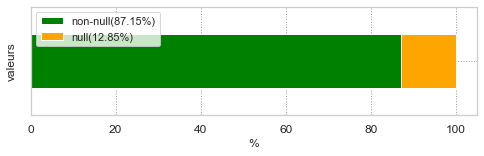

In [70]:
# Vérification de la structure du Data Set
verifier_taille(df16)
afficher_echantillon(df16)

# 1- Nettoyage des Données

## 1.1- Filtrage Colonnes

### 1.1.1- Colonnes Vides

In [71]:
nans = nan_cols(df15, 1)
nans # Affichage des colonnes vides trouvées

Column  #NaN   %NaN  #Not_NaN  %Not_NaN
0         ListOfAllPropertyUseTypes   127   3.80      3213     96.20
1            LargestPropertyUseType   136   4.07      3204     95.93
2         LargestPropertyUseTypeGFA   136   4.07      3204     95.93
3      SecondLargestPropertyUseType  1781  53.32      1559     46.68
4   SecondLargestPropertyUseTypeGFA  1781  53.32      1559     46.68
5       ThirdLargestPropertyUseType  2780  83.23       560     16.77
6    ThirdLargestPropertyUseTypeGFA  2780  83.23       560     16.77
7          YearsENERGYSTARCertified  3230  96.71       110      3.29
8                   ENERGYSTARScore   780  23.35      2560     76.65
9                           Comment  3327  99.61        13      0.39
10                          Outlier  3256  97.49        84      2.51
11               2010 Census Tracts  3116  93.29       224      6.71
12           City Council Districts  3127  93.62       213      6.38

In [72]:
nans = nan_cols(df16, 1) 
nans # Affichage des colonnes vides trouvées

Column  #NaN    %NaN  #Not_NaN  %Not_NaN
0     SecondLargestPropertyUseType  1697   50.27      1679     49.73
1  SecondLargestPropertyUseTypeGFA  1697   50.27      1679     49.73
2      ThirdLargestPropertyUseType  2780   82.35       596     17.65
3   ThirdLargestPropertyUseTypeGFA  2780   82.35       596     17.65
4         YearsENERGYSTARCertified  3257   96.48       119      3.52
5                  ENERGYSTARScore   843   24.97      2533     75.03
6                         Comments  3376  100.00         0      0.00
7                          Outlier  3344   99.05        32      0.95

### 1.1.2- Sélection des Colonnes Pertinentes

In [73]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyGFATotal', 'LargestPropertyUseType', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 	'Neighborhood', 'CouncilDistrictCode', 'Zip Codes',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']

df15s = df15[Cols]
df15s = renameCol(df15s, 'Zip Codes', 'ZipCode')
df15s = renameCol(df15s, 'SteamUse(kBtu)', 'SteamUse')
df15s = renameCol(df15s, 'Electricity(kBtu)', 'Electricity')
df15s = renameCol(df15s, 'NaturalGas(kBtu)', 'NaturalGas')
df15s = renameCol(df15s, 'SiteEnergyUseWN(kBtu)', 'TotalEnergy_2015')
df15s = renameCol(df15s, 'GHGEmissions(MetricTonsCO2e)', 'TotalEmission_2015')

df15s.head(2)

OSEBuildingID    BuildingType PrimaryPropertyType  PropertyGFATotal  \
0              1  NonResidential               Hotel             88434   
1              2  NonResidential               Hotel            103566   

  LargestPropertyUseType   SteamUse  Electricity  NaturalGas  ENERGYSTARScore  \
0                  Hotel  2023032.0    3686160.0   1272388.0             65.0   
1                  Hotel        0.0    3905411.0   4448985.0             51.0   

   TotalEnergy_2015  TotalEmission_2015 Neighborhood  CouncilDistrictCode  \
0         7097539.0              249.43     DOWNTOWN                    7   
1         8765788.0              263.51     DOWNTOWN                    7   

   ZipCode  YearBuilt  NumberofBuildings  NumberofFloors ComplianceStatus  \
0    18081       1927                  1            12.0        Compliant   
1    18081       1996                  1            11.0        Compliant   

  Outlier  
0     NaN  
1     NaN

In [74]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyGFATotal', 'LargestPropertyUseType', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 	'Neighborhood', 'CouncilDistrictCode', 'ZipCode',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']
 
df16s = df16[Cols]
df16s = renameCol(df16s, 'SteamUse(kBtu)', 'SteamUse')
df16s = renameCol(df16s, 'Electricity(kBtu)', 'Electricity')
df16s = renameCol(df16s, 'NaturalGas(kBtu)', 'NaturalGas')
df16s = renameCol(df16s, 'SiteEnergyUseWN(kBtu)', 'TotalEnergy_2016')
df16s = renameCol(df16s, 'TotalGHGEmissions', 'TotalEmission_2016')
df16s.head(2)

OSEBuildingID    BuildingType PrimaryPropertyType  PropertyGFATotal  \
0              1  NonResidential               Hotel             88434   
1              2  NonResidential               Hotel            103566   

  LargestPropertyUseType   SteamUse  Electricity  NaturalGas  ENERGYSTARScore  \
0                  Hotel  2003882.0    3946027.0   1276453.0             60.0   
1                  Hotel        0.0    3242851.0   5145082.0             61.0   

   TotalEnergy_2016  TotalEmission_2016 Neighborhood  CouncilDistrictCode  \
0         7456910.0              249.98     DOWNTOWN                    7   
1         8664479.0              295.86     DOWNTOWN                    7   

   ZipCode  YearBuilt  NumberofBuildings  NumberofFloors ComplianceStatus  \
0  98101.0       1927                1.0              12        Compliant   
1  98101.0       1996                1.0              11        Compliant   

  Outlier  
0     NaN  
1     NaN

## 1.2- Agrégation des Données 2015 & 2016

Le data set contient :
	- 3432 lignes et 19 colonnes.
	- 4352 valeurs manquantes, ce qui représente 6.67 % du data set.
Voici un sous-échantillon aléatoire :


OSEBuildingID          BuildingType   PrimaryPropertyType  \
1808          23465  Multifamily LR (1-4)  Low-Rise Multifamily   
3331          50056  Multifamily MR (5-9)  Mid-Rise Multifamily   

      PropertyGFATotal LargestPropertyUseType  SteamUse  Electricity  \
1808             51150    Multifamily Housing       0.0     588694.0   
3331            128460    Multifamily Housing       0.0    2127077.0   

      NaturalGas  ENERGYSTARScore           Neighborhood  CouncilDistrictCode  \
1808   2656904.0             70.0  MAGNOLIA / QUEEN ANNE                    7   
3331         0.0             99.0                   EAST                    3   

      ZipCode  YearBuilt  NumberofBuildings  NumberofFloors ComplianceStatus  \
1808  98119.0       1924                1.0             4.0        Compliant   
3331  98122.0       2015                1.0             6.0        Compliant   

     Outlier  TotalEnergy  TotalEmission  
1808     NaN  3791137.125        146.955  
3331     NaN  2127077.250         14.830

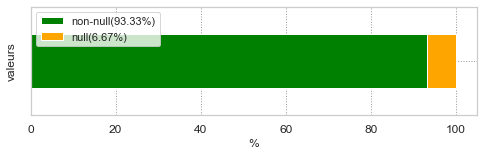

In [75]:
# Jointure des data sets 2015 & 2016 
df = pd.merge(df16s, df15s[['OSEBuildingID', 'TotalEnergy_2015', 'TotalEmission_2015']], how='left', on=['OSEBuildingID'])
df = pd.concat([df, df15s[~df15s['OSEBuildingID'].isin(df16s['OSEBuildingID'])]], axis=0)


# Agrégation des colonnes TotalEnergy & TotalEmission de 2015 & 2016 grâce à la médiane
df['TotalEnergy'] = df[['TotalEnergy_2015','TotalEnergy_2016']].median(axis=1)
df['TotalEmission'] = df[['TotalEmission_2015','TotalEmission_2016']].median(axis=1)

df = df.drop(columns=['TotalEnergy_2015', 'TotalEmission_2015', 'TotalEnergy_2016', 'TotalEmission_2016'])

df = df.reset_index(drop=True)

verifier_taille(df)
afficher_echantillon(df)

## 1.3- Nettoyage des Catégories

In [76]:
categories = colsOfType(df, 'object')
categories

['BuildingType',
 'PrimaryPropertyType',
 'LargestPropertyUseType',
 'Neighborhood',
 'ComplianceStatus',
 'Outlier']

In [77]:
for categorie in categories[:-2]:
    print('------------', categorie, '------------')
    print(df[categorie].sort_values().unique())

------------ BuildingType ------------
['Campus' 'Multifamily HR (10+)' 'Multifamily LR (1-4)'
 'Multifamily MR (5-9)' 'NonResidential' 'Nonresidential COS'
 'Nonresidential WA' 'SPS-District K-12']
------------ PrimaryPropertyType ------------
['Distribution Center' 'High-Rise Multifamily' 'Hospital' 'Hotel'
 'K-12 School' 'Laboratory' 'Large Office' 'Low-Rise Multifamily'
 'Medical Office' 'Mid-Rise Multifamily' 'Mixed Use Property'
 'Non-Refrigerated Warehouse' 'Office' 'Other' 'Refrigerated Warehouse'
 'Residence Hall' 'Restaurant' 'Restaurant\n' 'Retail Store'
 'Self-Storage Facility' 'Senior Care Community'
 'Small- and Mid-Sized Office' 'Supermarket / Grocery Store' 'University'
 'Warehouse' 'Worship Facility']
------------ LargestPropertyUseType ------------
['Adult Education' 'Automobile Dealership' 'Bank Branch'
 'College/University' 'Convention Center' 'Courthouse' 'Data Center'
 'Distribution Center' 'Financial Office' 'Fire Station'
 'Fitness Center/Health Club/Gym' 'Food 

In [78]:
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].replace('Restaurant\n', 'Restaurant')
df['PrimaryPropertyType'].sort_values().unique()

array(['Distribution Center', 'High-Rise Multifamily', 'Hospital',
       'Hotel', 'K-12 School', 'Laboratory', 'Large Office',
       'Low-Rise Multifamily', 'Medical Office', 'Mid-Rise Multifamily',
       'Mixed Use Property', 'Non-Refrigerated Warehouse', 'Office',
       'Other', 'Refrigerated Warehouse', 'Residence Hall', 'Restaurant',
       'Retail Store', 'Self-Storage Facility', 'Senior Care Community',
       'Small- and Mid-Sized Office', 'Supermarket / Grocery Store',
       'University', 'Warehouse', 'Worship Facility'], dtype=object)

In [79]:
nan_index = df[df['LargestPropertyUseType'].isnull()].index
nan_index
df.iloc[nan_index, df.columns.get_loc('LargestPropertyUseType')] = df.iloc[nan_index, df.columns.get_loc('PrimaryPropertyType')]

df['LargestPropertyUseType'].sort_values().unique()

array(['Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse',
       'Data Center', 'Distribution Center', 'Financial Office',
       'Fire Station', 'Fitness Center/Health Club/Gym', 'Food Service',
       'High-Rise Multifamily', 'Hospital (General Medical & Surgical)',
       'Hotel', 'K-12 School', 'Laboratory', 'Library',
       'Lifestyle Center', 'Low-Rise Multifamily',
       'Manufacturing/Industrial Plant', 'Medical Office',
       'Mid-Rise Multifamily', 'Mixed Use Property', 'Movie Theater',
       'Multifamily Housing', 'Museum', 'Non-Refrigerated Warehouse',
       'Office', 'Other', 'Other - Education',
       'Other - Entertainment/Public Assembly',
       'Other - Lodging/Residential', 'Other - Mall',
       'Other - Public Services', 'Other - Recreation',
       'Other - Restaurant/Bar', 'Other - Services', 'Other - Utility',
       'Other/Specialty Hospital',
       'Outpatient Rehabilitation/Physica

In [80]:
df = df.drop(columns=['PrimaryPropertyType'])

In [81]:
df['Neighborhood'] = df['Neighborhood'].str.capitalize()
df['Neighborhood'].sort_values().unique()

array(['Ballard', 'Central', 'Delridge', 'Delridge neighborhoods',
       'Downtown', 'East', 'Greater duwamish', 'Lake union',
       'Magnolia / queen anne', 'North', 'Northeast', 'Northwest',
       'Southeast', 'Southwest'], dtype=object)

## 1.4- Filtrage Lignes

### 1.4.1- Doublons

In [82]:
doublons(df15['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

In [83]:
doublons(df16['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

### 1.4.2- Valeurs Manquantes

In [84]:
nan_cols(df, 0.01)

Column  #NaN   %NaN  #Not_NaN  %Not_NaN
0           SteamUse    10   0.29      3422     99.71
1        Electricity    10   0.29      3422     99.71
2         NaturalGas    10   0.29      3422     99.71
3    ENERGYSTARScore   858  25.00      2574     75.00
4            ZipCode    16   0.47      3416     99.53
5  NumberofBuildings     8   0.23      3424     99.77
6            Outlier  3397  98.98        35      1.02
7        TotalEnergy     3   0.09      3429     99.91
8      TotalEmission     4   0.12      3428     99.88

In [85]:
nans = valeurs_manquantes(df[['ZipCode','LargestPropertyUseType', 'SteamUse', 'Electricity', 'NaturalGas', 'NumberofBuildings', 'TotalEnergy',	'TotalEmission']])
df.iloc[nans.index, :].head(2)

OSEBuildingID          BuildingType  PropertyGFATotal  \
578            773        NonResidential             63150   
758          19798  Multifamily LR (1-4)             33166   

          LargestPropertyUseType  SteamUse  Electricity  NaturalGas  \
578  Small- and Mid-Sized Office       NaN          NaN         NaN   
758         Low-Rise Multifamily       NaN          NaN         NaN   

     ENERGYSTARScore Neighborhood  CouncilDistrictCode  ZipCode  YearBuilt  \
578              NaN     Downtown                    7  98104.0       1924   
758              NaN    Northeast                    4  98115.0       1977   

     NumberofBuildings  NumberofFloors ComplianceStatus Outlier  TotalEnergy  \
578                NaN             4.0    Non-Compliant     NaN    2982178.0   
758                NaN             3.0    Non-Compliant     NaN          NaN   

     TotalEmission  
578          35.69  
758            NaN

In [86]:
df = df.drop(index=nans.index)

### 1.4.3- Bâtiments Non Confomres

In [87]:
df[df['ComplianceStatus']=='Not Compliant']
df = df.drop(columns=['ComplianceStatus'])

### 1.4.4-  Imputation de l'ENERGYSTARScore

In [88]:
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=10, weights='distance')
df['ENERGYSTARScore'] = imp.fit_transform(df[['ENERGYSTARScore']]).ravel()

### 1.4.5-  Outliers

In [89]:
df.Outlier.unique()

array([nan, 'High outlier', 'Low outlier', 'Low Outlier'], dtype=object)

In [90]:
outliers = df[df['Outlier'].isin(['High Outlier', 'Low Outlier', 'Low Outlier'])]['OSEBuildingID'].values.tolist()
df = df[~df['OSEBuildingID'].isin(outliers)]
df = df.drop(columns=['Outlier'])
outliers

[19656, 22446, 24194]

Le data set contient :
	- 3403 lignes et 16 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.
Voici un sous-échantillon aléatoire :


OSEBuildingID    BuildingType  PropertyGFATotal  \
187            295  NonResidential            230880   
544            735  NonResidential             56259   

         LargestPropertyUseType  SteamUse  Electricity  NaturalGas  \
187                       Other       0.0   62197171.0         0.0   
544  Non-Refrigerated Warehouse       0.0     817697.0   1528874.0   

     ENERGYSTARScore           Neighborhood  CouncilDistrictCode  ZipCode  \
187        68.000778               Downtown                    7  98101.0   
544        68.000778  Magnolia / queen anne                    7  98199.0   

     YearBuilt  NumberofBuildings  NumberofFloors  TotalEnergy  TotalEmission  
187       1955                1.0            15.0  62005988.00        438.730  
544       1974                0.0             3.0   2723453.25         82.645

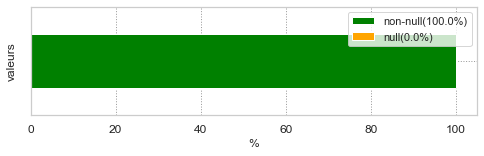

In [91]:
# Vérification de la structure du Data Set
verifier_taille(df)
afficher_echantillon(df)

# 2- Analyse & Transformation des Attributs

In [92]:
classes = ['TotalEnergy', 'TotalEmission']
Attributs = df.columns.tolist()[1:]
for c in classes:
    Attributs.remove(c)

In [93]:
Attributs

['BuildingType',
 'PropertyGFATotal',
 'LargestPropertyUseType',
 'SteamUse',
 'Electricity',
 'NaturalGas',
 'ENERGYSTARScore',
 'Neighborhood',
 'CouncilDistrictCode',
 'ZipCode',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors']

## 2.1- Distributions

In [94]:
df[Attributs].describe()

PropertyGFATotal      SteamUse   Electricity    NaturalGas  \
count      3.403000e+03  3.403000e+03  3.403000e+03  3.403000e+03   
mean       9.517652e+04  2.791679e+05  3.727660e+06  1.381675e+06   
std        2.184644e+05  3.908753e+06  1.483802e+07  6.812874e+06   
min        1.630000e+04  0.000000e+00 -1.154170e+05  0.000000e+00   
25%        2.867850e+04  0.000000e+00  6.423830e+05  0.000000e+00   
50%        4.455800e+04  0.000000e+00  1.182111e+06  3.111820e+05   
75%        9.117150e+04  0.000000e+00  2.826344e+06  1.187654e+06   
max        9.320156e+06  1.349435e+08  6.570744e+08  2.979090e+08   

       ENERGYSTARScore  CouncilDistrictCode       ZipCode    YearBuilt  \
count      3403.000000          3403.000000   3403.000000  3403.000000   
mean         67.981971             4.451073  96903.961211  1968.395533   
std          23.282831             2.119629   9739.191204    33.178537   
min           1.000000             1.000000  17919.000000  1900.000000   
25%          61.000000             3.000000  98104.000000  1948.000000   
50%          68.000778             4.000000  98112.000000  1974.000000   
75%          85.500000             7.000000  98122.000000  1997.000000   
max         100.000000             7.000000  98272.000000  2015.000000   

       NumberofBuildings  NumberofFloors  
count        3403.000000     3403.000000  
mean            1.107552        4.711137  
std             2.099987        5.474784  
min             0.000000        0.000000  
25%             1.000000        2.000000  
50%             1.000000        4.000000  
75%             1.000000        5.000000  
max           111.000000       99.000000

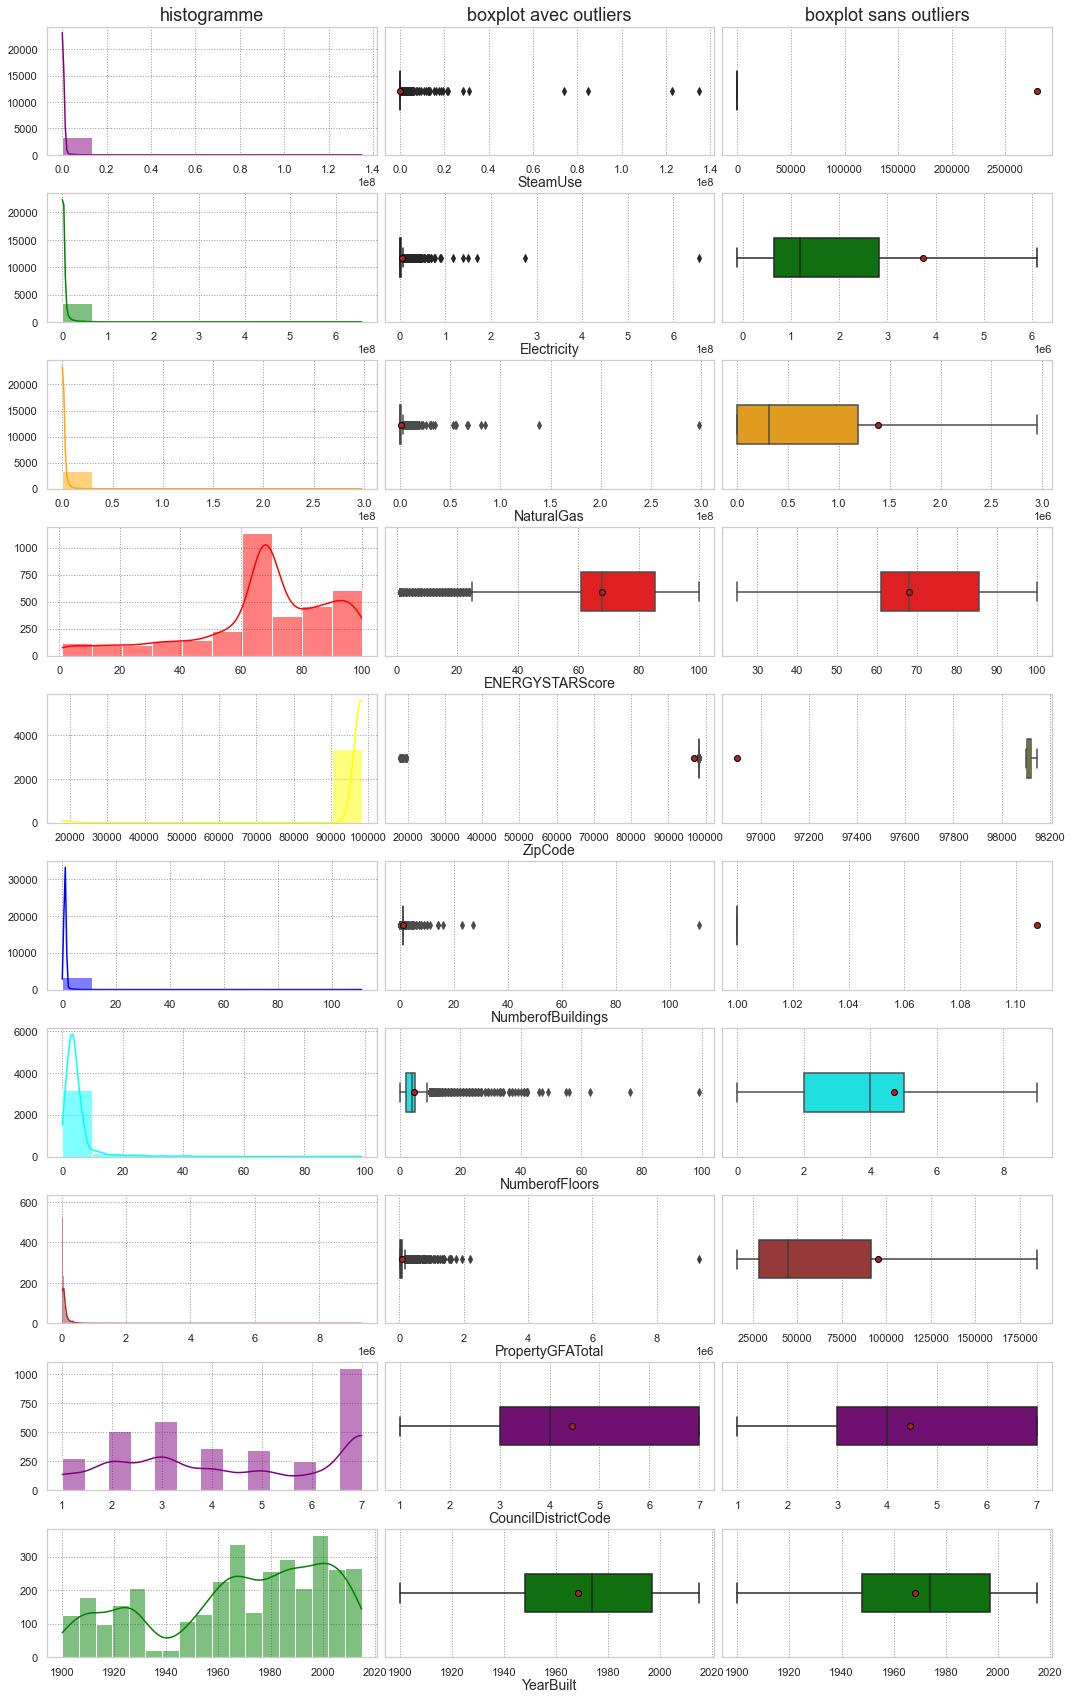

In [95]:
histo_distribution(df[Attributs])

## 2.2- ANOVA

### 2.2.1- BuildingType

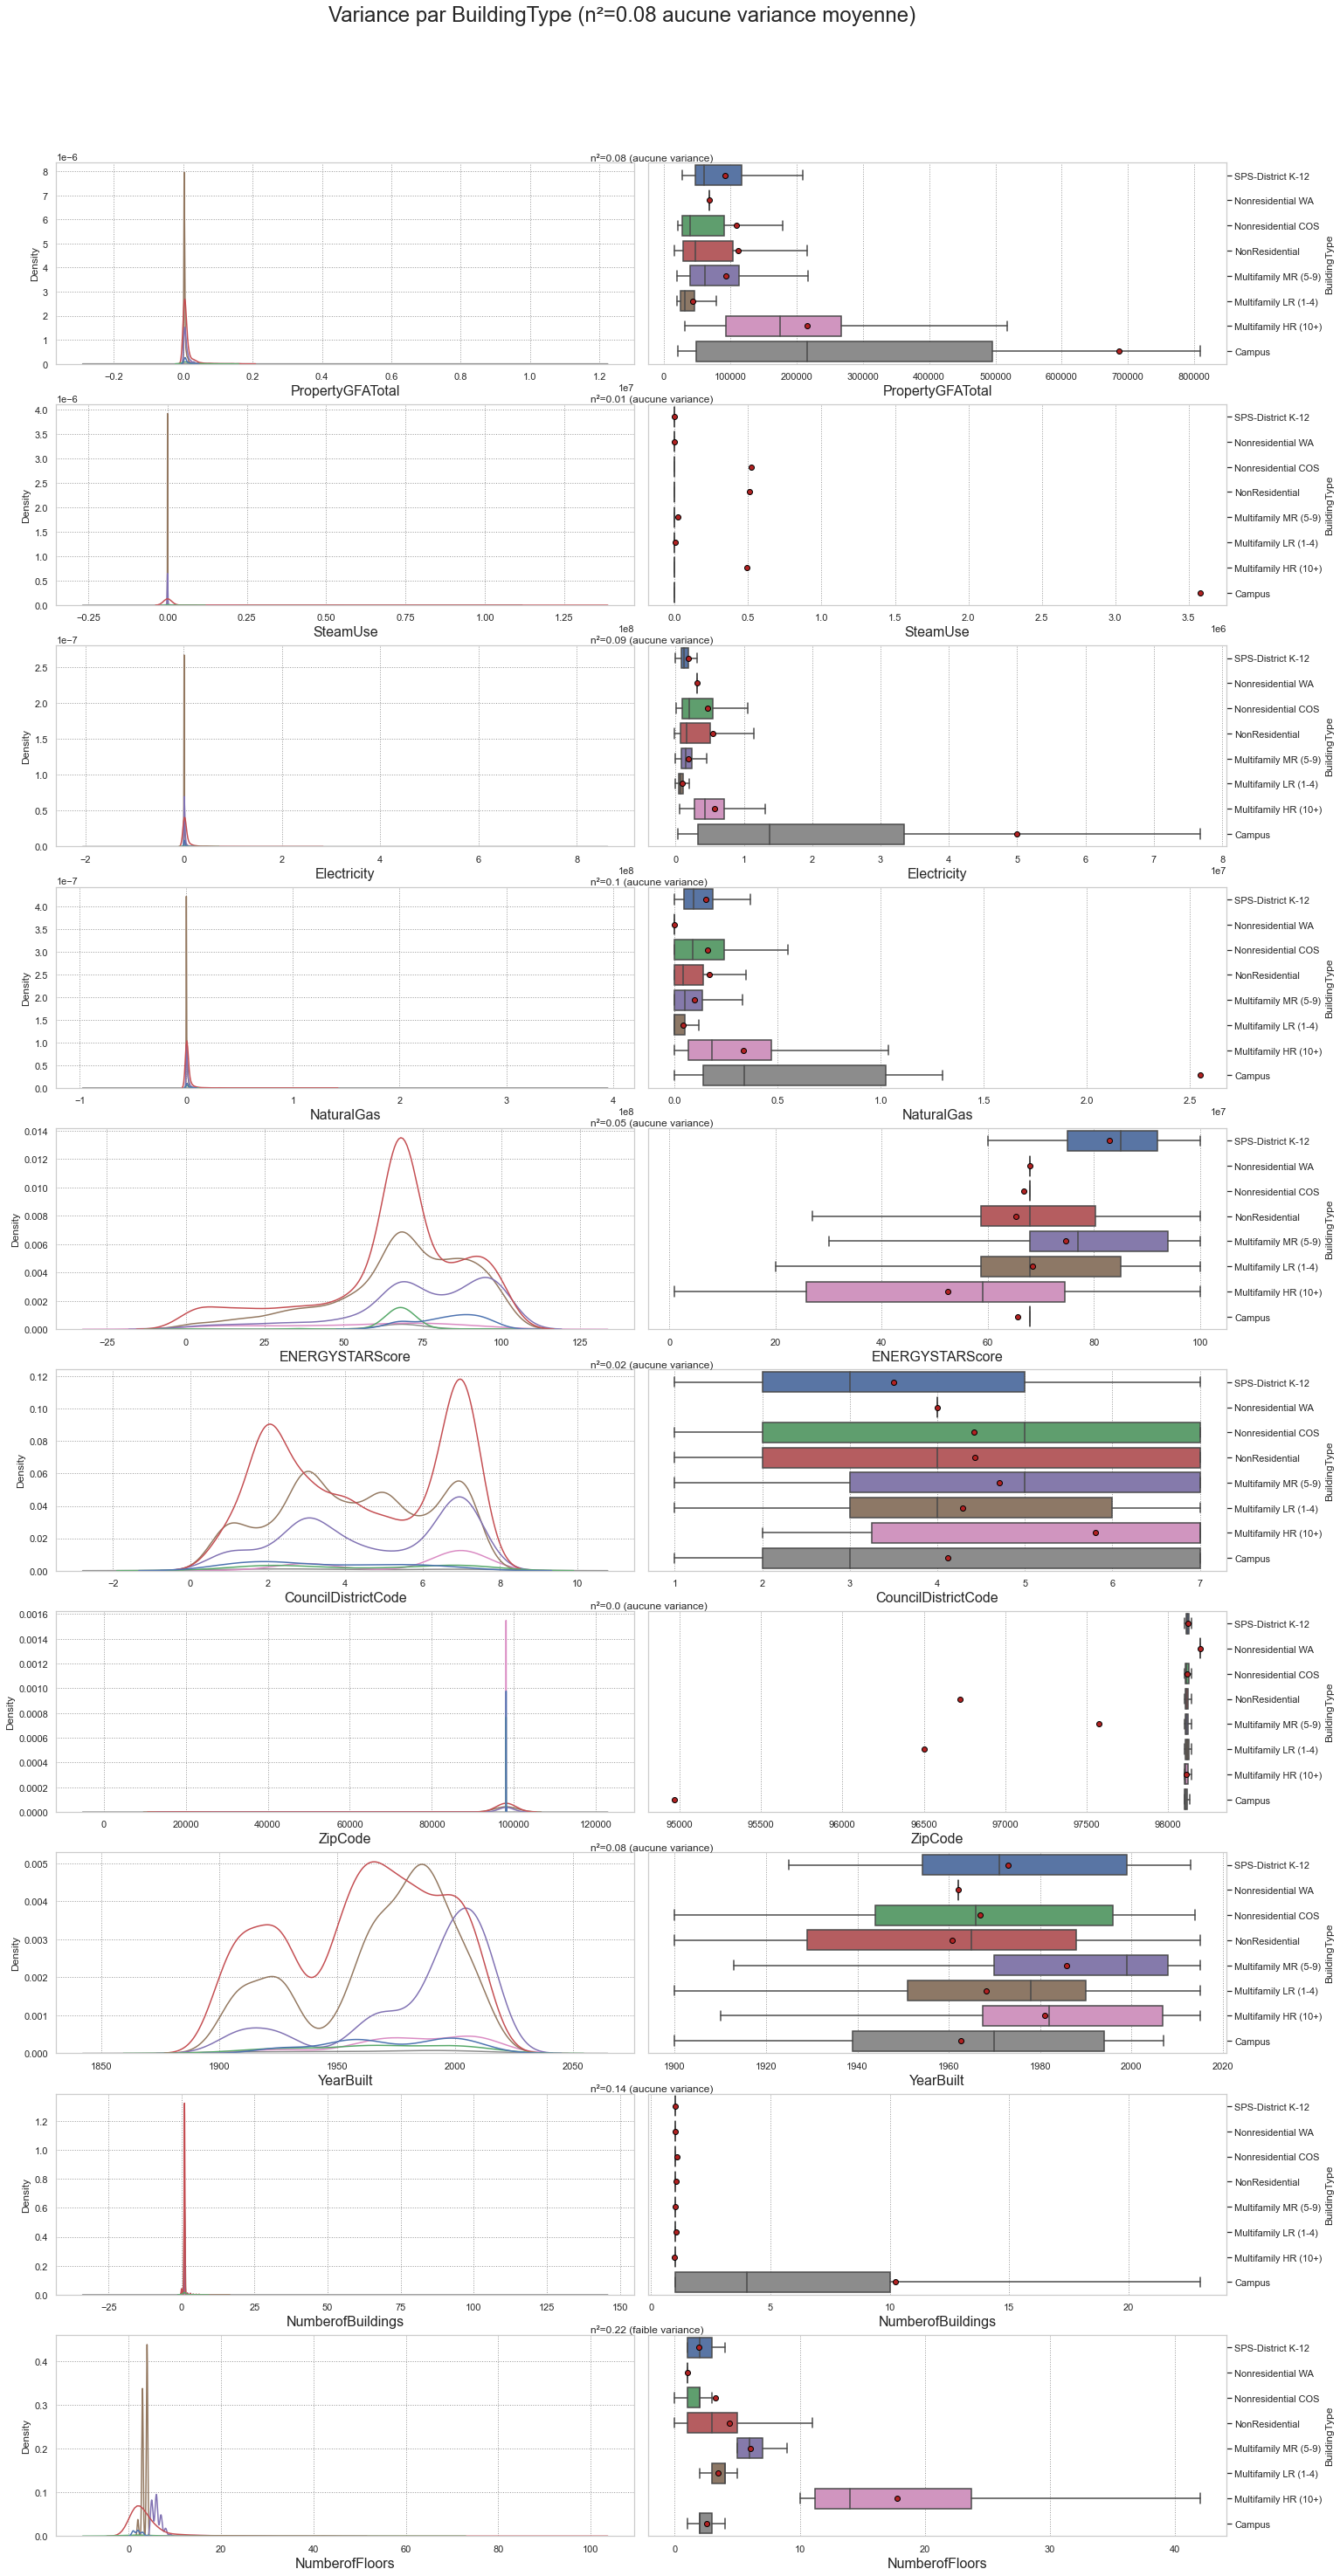

In [96]:
X = 'BuildingType'
ANOVA(df, X, Attributs)

### 2.2.2- LargestPropertyUseType

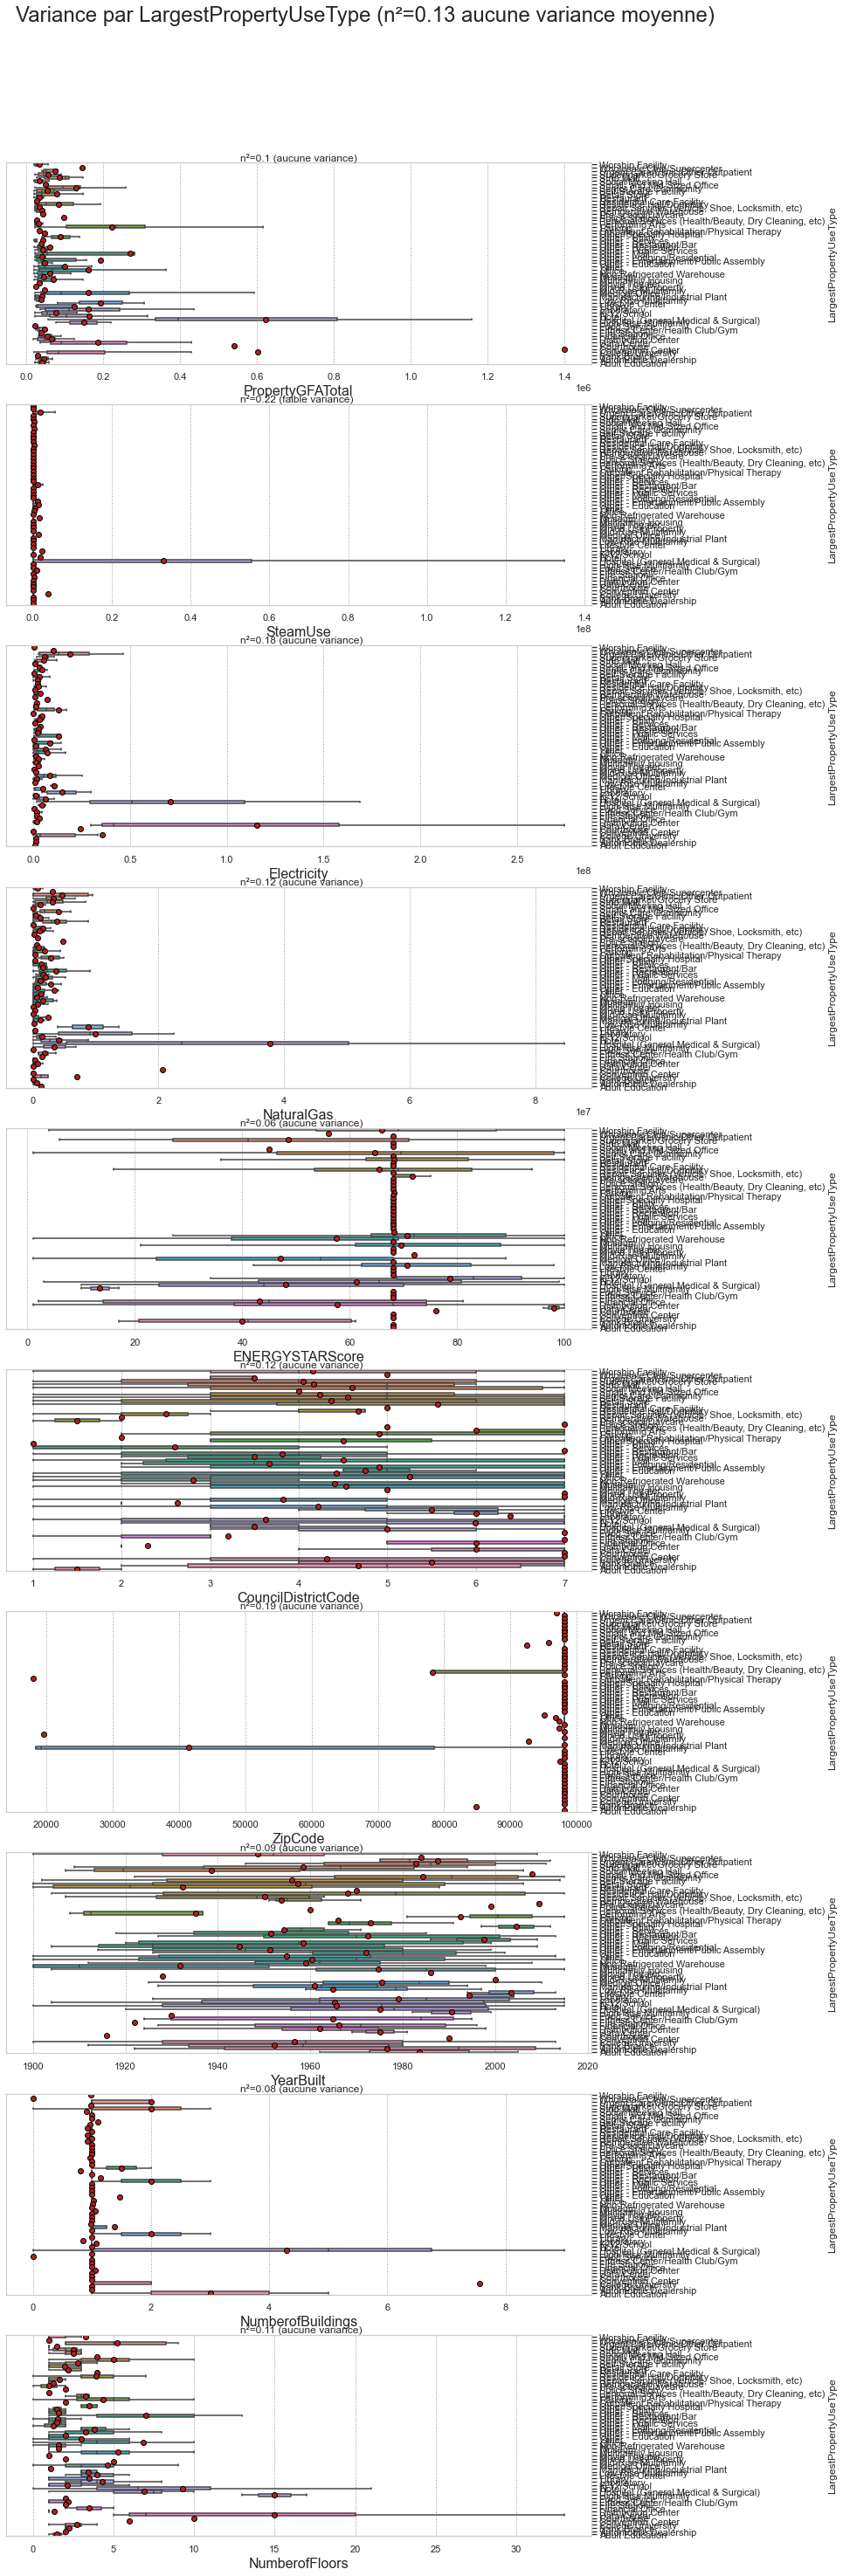

In [97]:
X = 'LargestPropertyUseType'
ANOVA(df, X, Attributs, display_kde=False)

### 2.2.3- Neighborhood

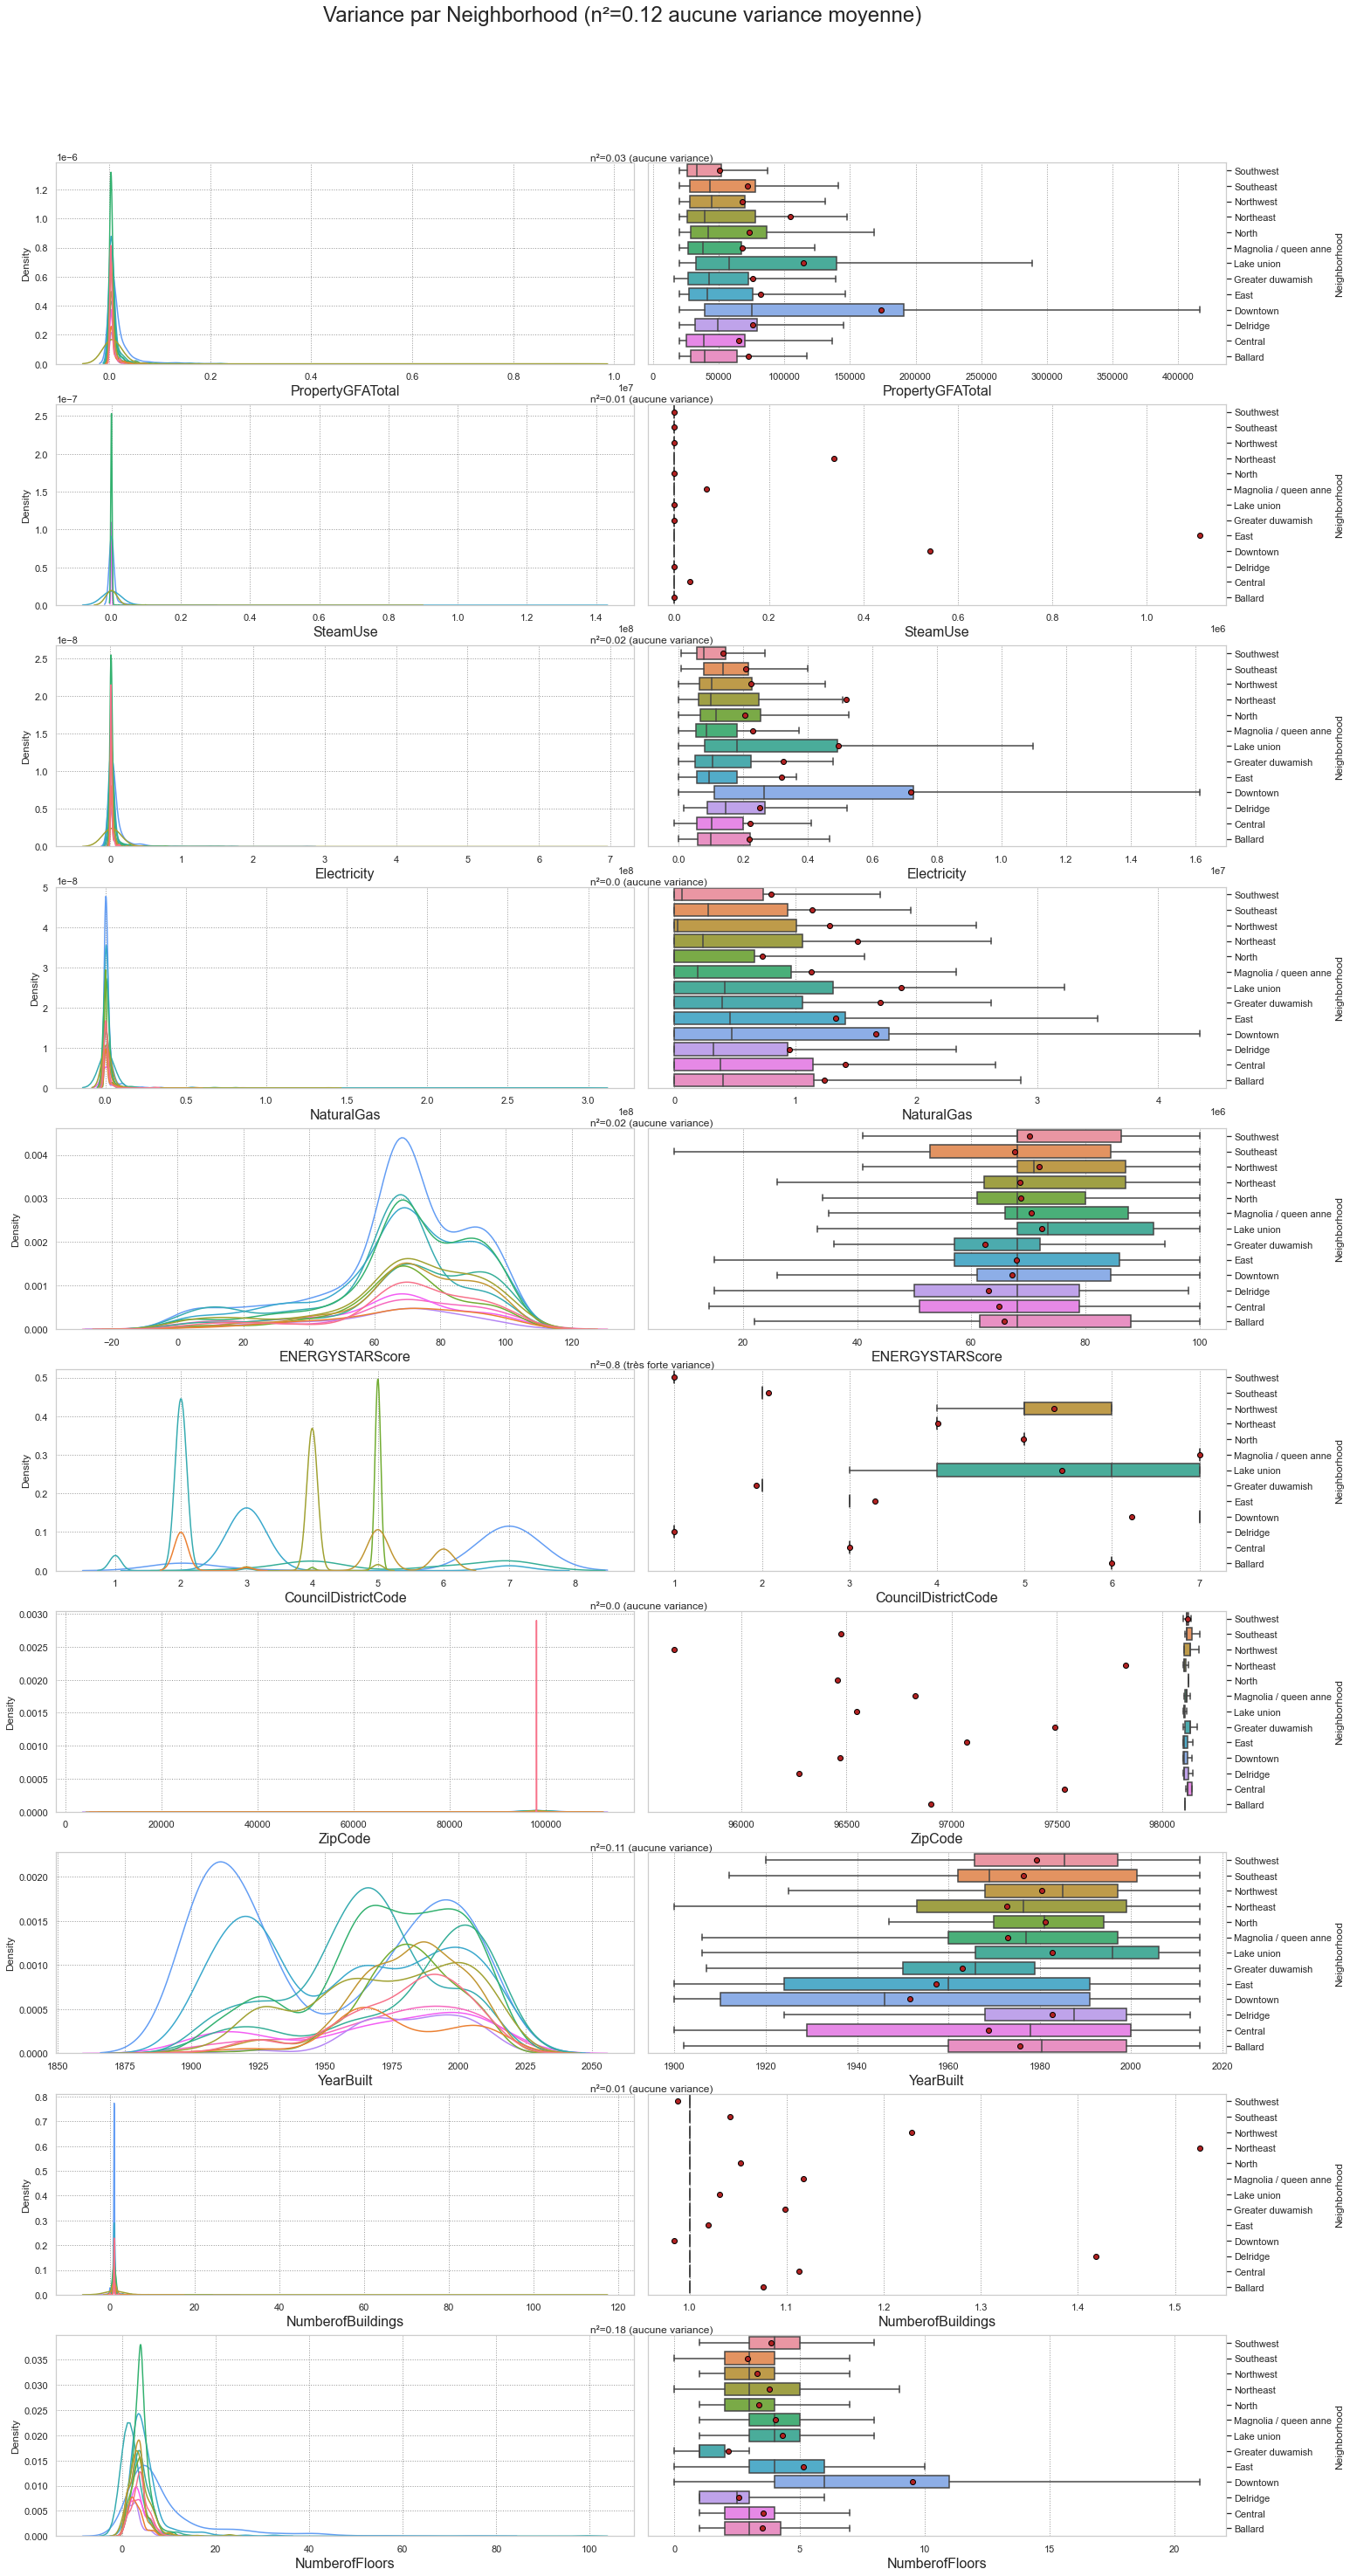

In [98]:
X = 'Neighborhood'
ANOVA(df, X, Attributs)

## 2.3- Correlations

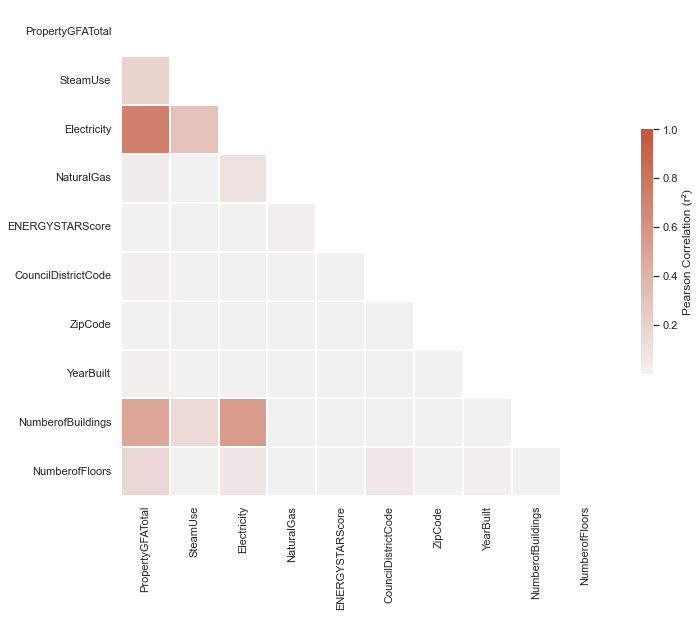

In [99]:
correlation_matrix(df[Attributs])

## 2.3- Encodage des Catégories

### 2.3.1- One Hot Encoding

In [100]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()
# results = encoder.fit_transform(df[colsOfType(df, 'object')])
# encoder.categories_
# pd.DataFrame(results.toarray(), columns=encoder.categories_).head()

### 2.3.2- Binarisation

In [101]:
df['SteamUse'] = df['SteamUse'].apply(lambda x : 1 if x>0 else 0)
df['Electricity'] = df['Electricity'].apply(lambda x : 1 if x>0 else 0)
df['NaturalGas'] = df['NaturalGas'].apply(lambda x : 1 if x>0 else 0)

df[['SteamUse', 'Electricity', 'NaturalGas']]

SteamUse  Electricity  NaturalGas
0            1            1           1
1            0            1           1
2            1            1           1
3            1            1           1
4            0            1           1
...        ...          ...         ...
3427         0            1           0
3428         0            1           1
3429         0            1           0
3430         0            1           1
3431         0            1           1

[3403 rows x 3 columns]

# 3- Analyse & Transformation des Classes

In [102]:
q = df['TotalEnergy'].quantile([0.95]).values[0]
print(q)
df[df['TotalEnergy']>=q]
# df = df[df['TotalEnergy']<q]
# df.head(5)

18411388.449999914


OSEBuildingID          BuildingType  PropertyGFATotal  \
2                 3        NonResidential            956110   
11               16        NonResidential            333176   
13               18        NonResidential            315952   
17               23        NonResidential            416281   
20               26        NonResidential            540360   
...             ...                   ...               ...   
3286          49992  Multifamily HR (10+)            619416   
3317          50031        NonResidential            513816   
3356          50094        NonResidential            345290   
3384            675        NonResidential            434475   
3431          49859                Campus            808520   

     LargestPropertyUseType  SteamUse  Electricity  NaturalGas  \
2                     Hotel         1            1           1   
11                    Hotel         1            1           1   
13                    Hotel         1            1           1   
17                    Hotel         0            1           1   
20               Courthouse         0            1           1   
...                     ...       ...          ...         ...   
3286    Multifamily Housing         0            1           1   
3317                 Office         0            1           1   
3356             Laboratory         0            1           1   
3384         Medical Office         1            1           0   
3431                  Other         0            1           1   

      ENERGYSTARScore           Neighborhood  CouncilDistrictCode  ZipCode  \
2           43.000000               Downtown                    7  98101.0   
11          36.000000               Downtown                    7  98101.0   
13          58.000000               Downtown                    7  98101.0   
17          31.000000               Downtown                    7  98104.0   
20          76.000000               Downtown                    7  98104.0   
...               ...                    ...                  ...      ...   
3286        89.000000               Downtown                    2  98104.0   
3317        68.000778  Magnolia / queen anne                    7  98109.0   
3356        68.000778             Lake union                    7  98109.0   
3384        60.000000                   East                    3  18379.0   
3431        68.000778  Magnolia / queen anne                    7  19575.0   

      YearBuilt  NumberofBuildings  NumberofFloors  TotalEnergy  TotalEmission  
2          1969                1.0            41.0   74721692.0       2075.380  
11         1998                1.0            25.0   27520468.0        732.185  
13         1980                1.0            33.0   22668319.0        661.980  
17         1983                1.0            28.0   34136968.0        779.005  
20         1916                1.0            10.0   51201022.0       1430.685  
...         ...                ...             ...          ...            ...  
3286       2014                1.0            26.0   23634233.0        639.330  
3317       2015                1.0            10.0   18760766.0        214.190  
3356       2015                1.0             6.0   41078600.0       1000.060  
3384       2008                1.0            15.0   56652364.0       1891.470  
3431       2002                7.0             4.0  166523440.0       4829.860  

[171 rows x 16 columns]

## 3.1- Distributions

In [103]:
df[classes].describe()

TotalEnergy  TotalEmission
count  3.403000e+03    3403.000000
mean   5.340353e+06     119.873548
std    1.601437e+07     536.170800
min    0.000000e+00       0.090000
25%    9.947971e+05       9.597500
50%    1.949099e+06      34.065000
75%    4.443200e+06      92.327500
max    4.716139e+08   16870.980000

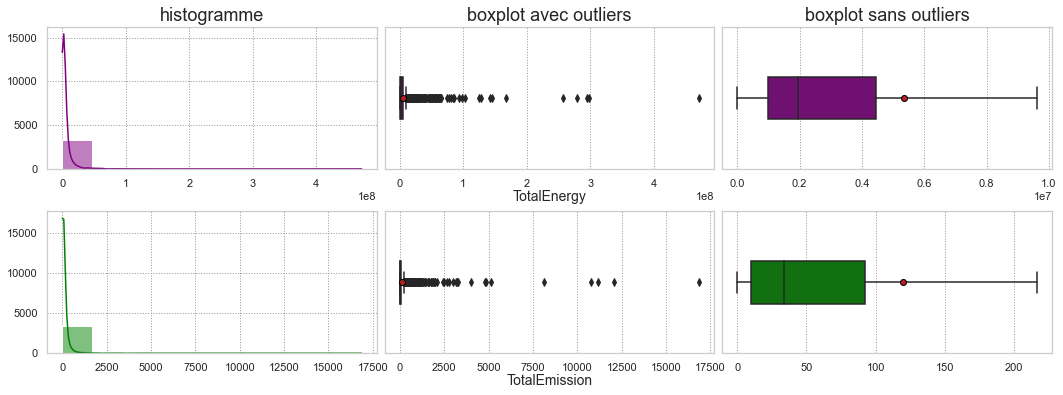

In [104]:
histo_distribution(df[classes])

## 3.2- Equilibrage des Classes

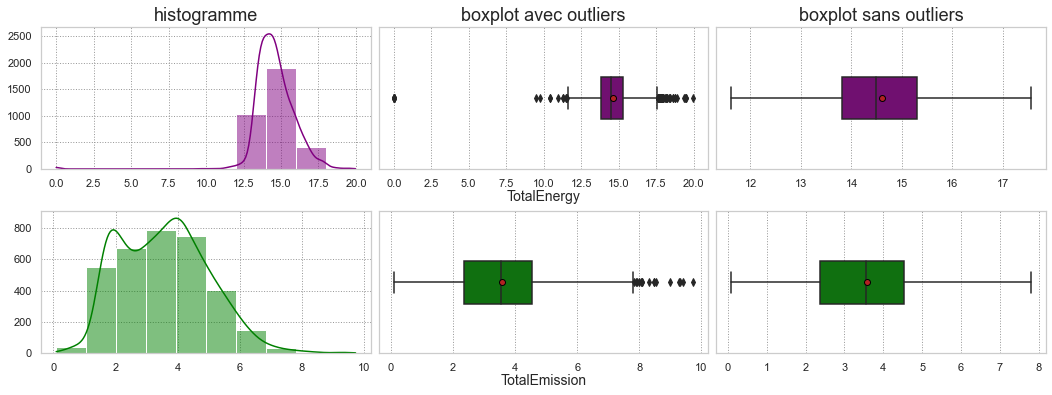

In [105]:
df['TotalEnergy'] = np.log(df['TotalEnergy']+1)
df['TotalEmission'] = np.log(df['TotalEmission']+1)

histo_distribution(df[['TotalEnergy', 'TotalEmission']])

In [106]:
low_outlier = df[(df[classes[0]]==0.0) | (df[classes[1]]==0.0)]['OSEBuildingID'].values.tolist()
df = df[~df['OSEBuildingID'].isin(low_outlier)]
outliers += low_outlier
low_outlier

[87, 20130, 20324, 49967, 49968, 49972, 50014, 50044, 26938]

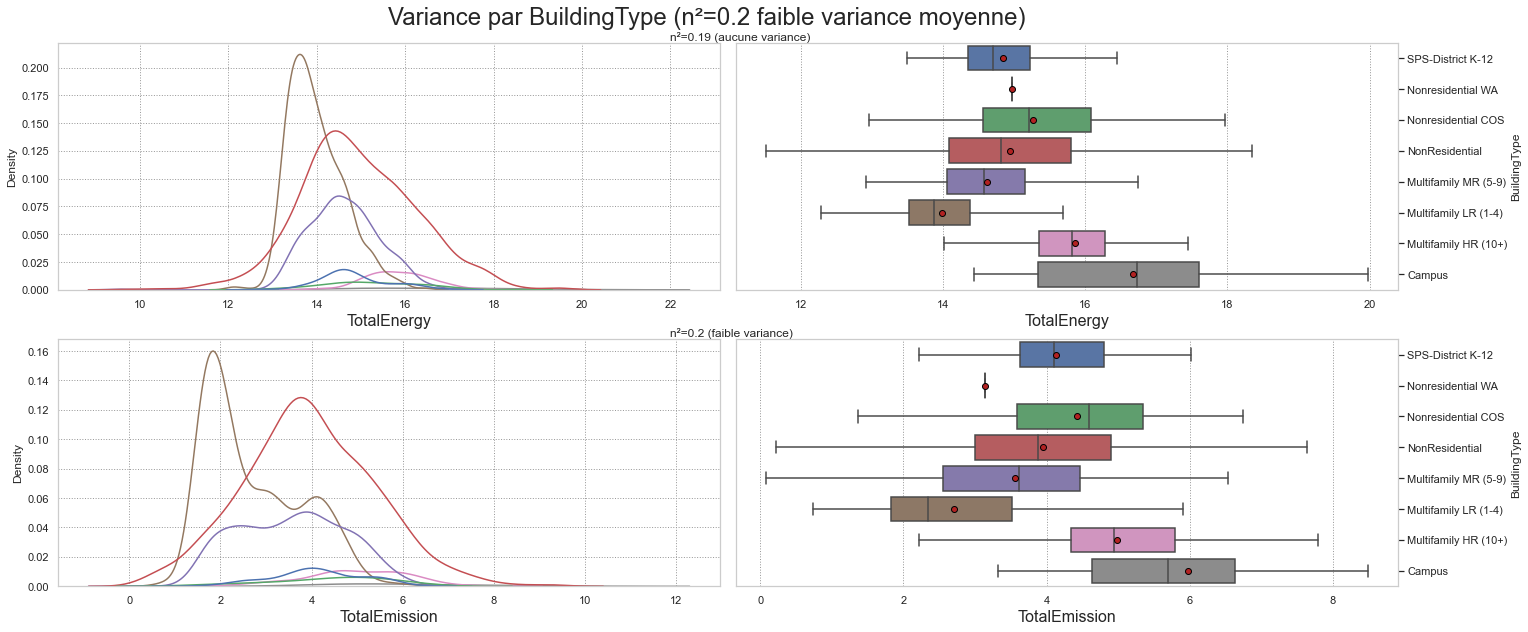

In [107]:
X = 'BuildingType'
ANOVA(df, X, ['TotalEnergy', 'TotalEmission'])

## 3.3- ANOVA

### 3.3.1- BuildingType

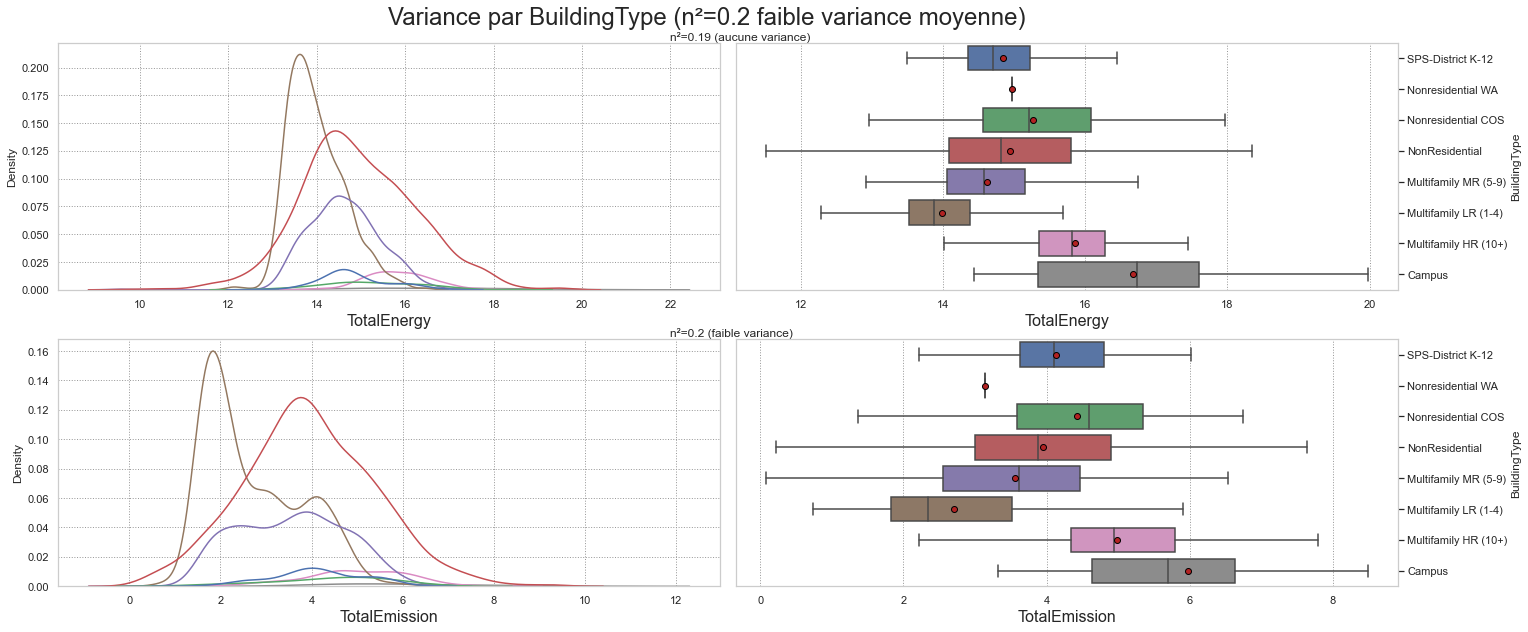

In [108]:
X = 'BuildingType'
ANOVA(df, X, ['TotalEnergy', 'TotalEmission'])

### 3.3.2- LargestPropertyUseType

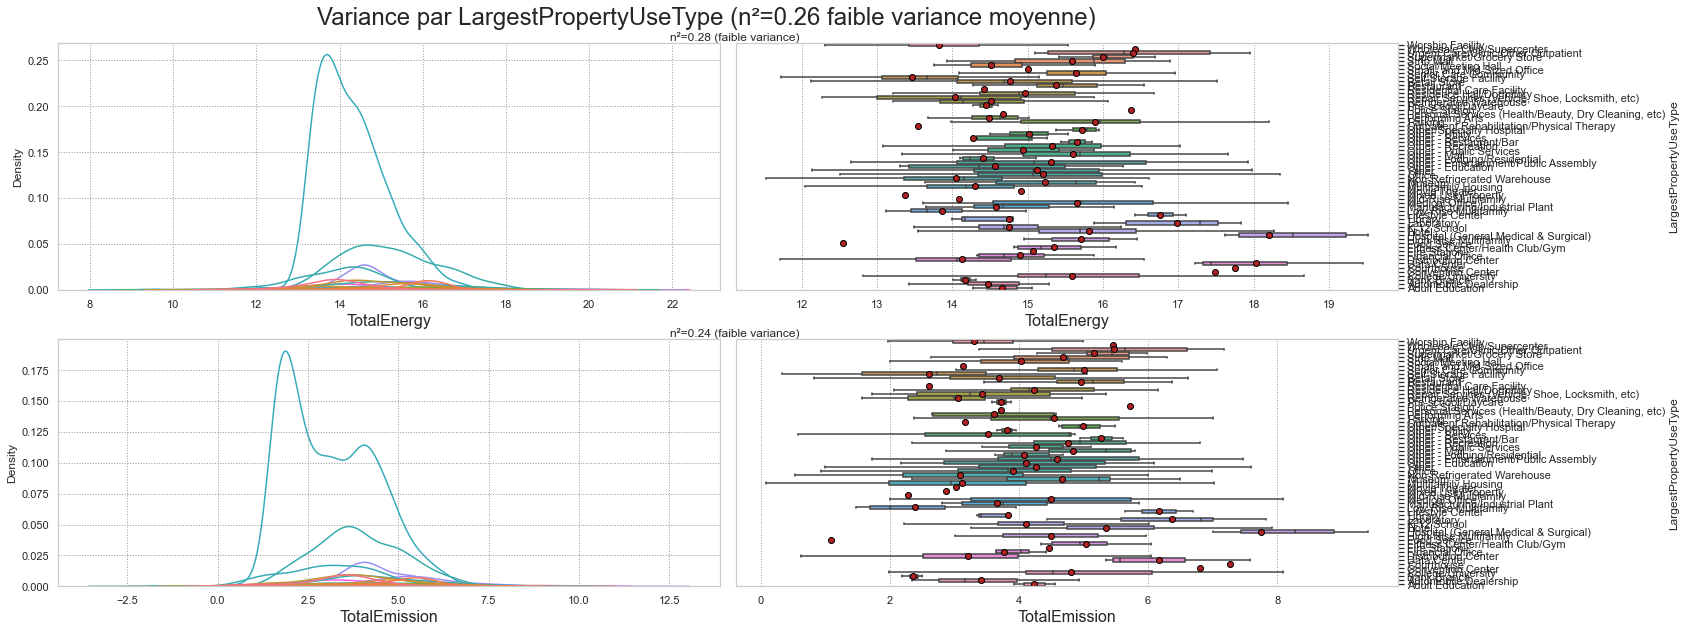

In [109]:
X = 'LargestPropertyUseType'
ANOVA(df, X, ['TotalEnergy', 'TotalEmission'])

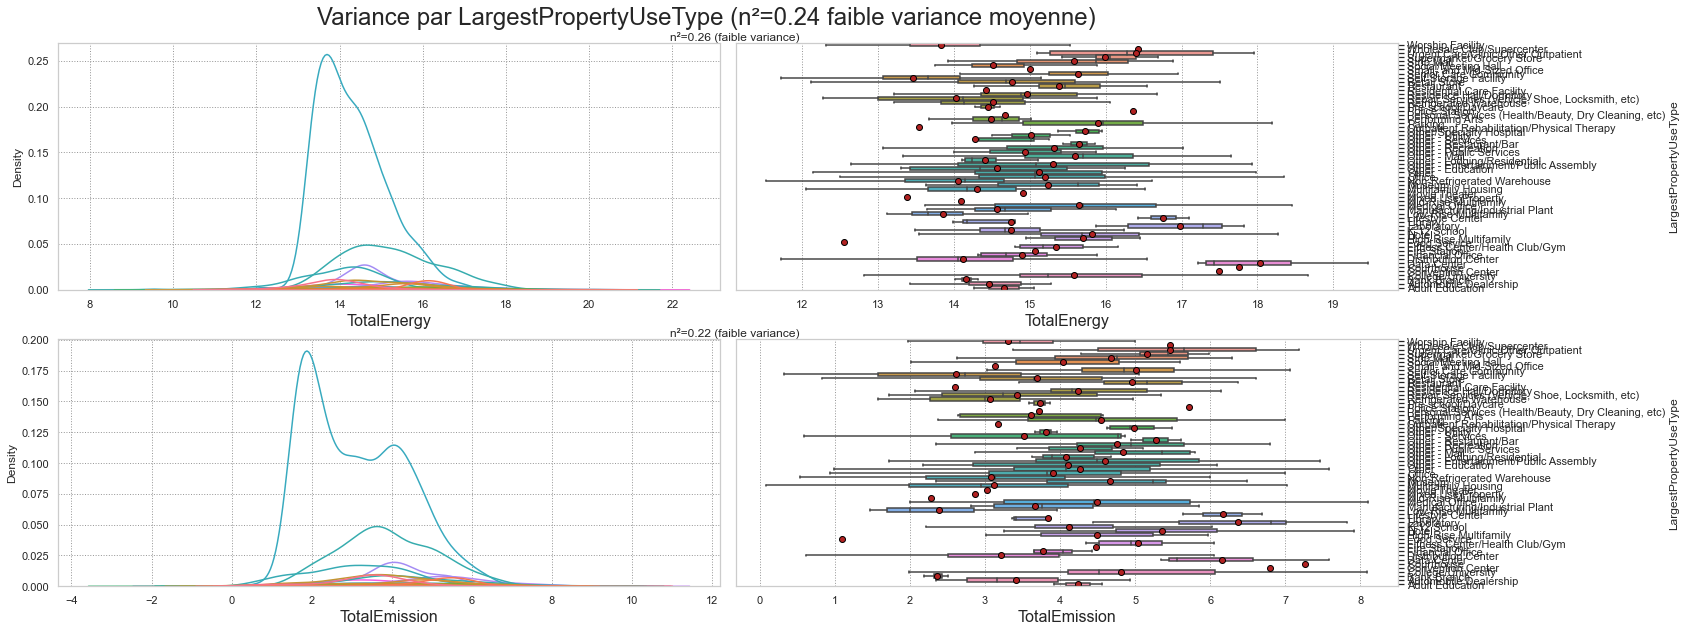

In [110]:
X = 'LargestPropertyUseType'
ANOVA(df[df['LargestPropertyUseType']!='Hospital (General Medical & Surgical)'], X, ['TotalEnergy', 'TotalEmission'])

### 3.3.3- Neighborhood

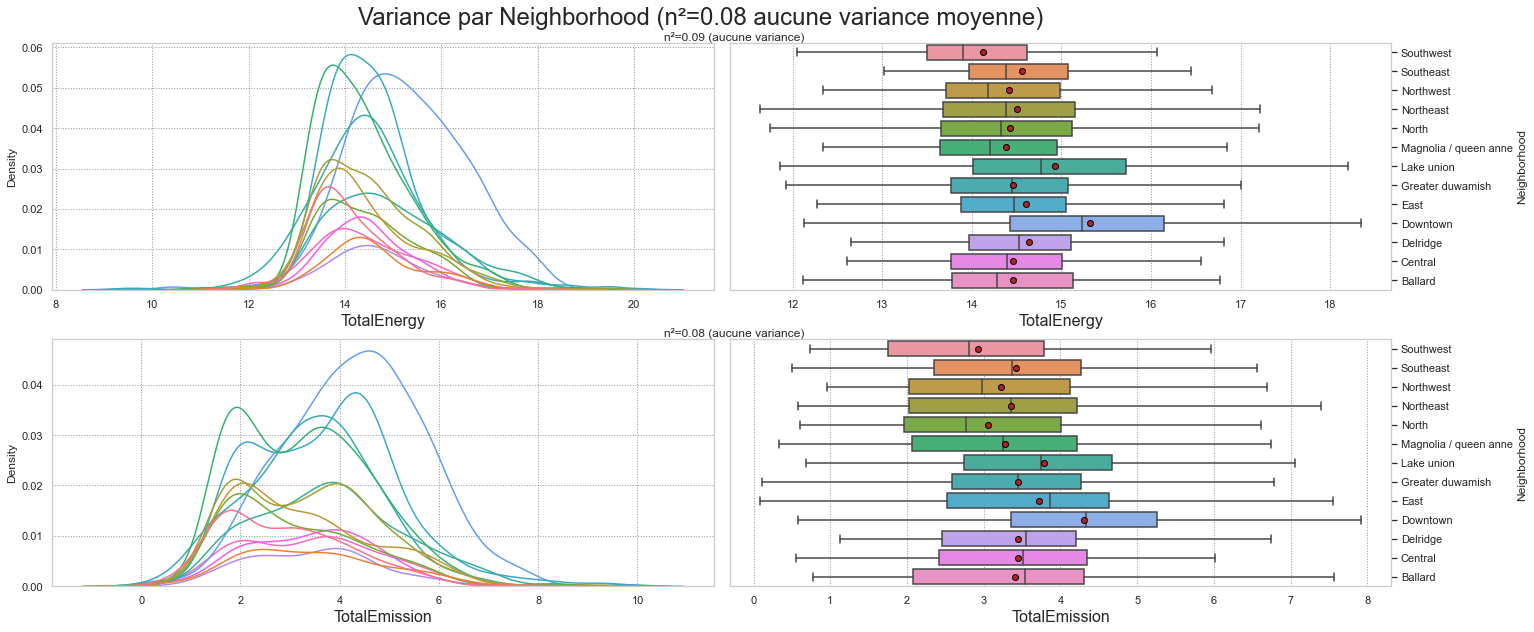

In [111]:
X = 'Neighborhood'
ANOVA(df, X, ['TotalEnergy', 'TotalEmission'])

## 3.4- Correlations

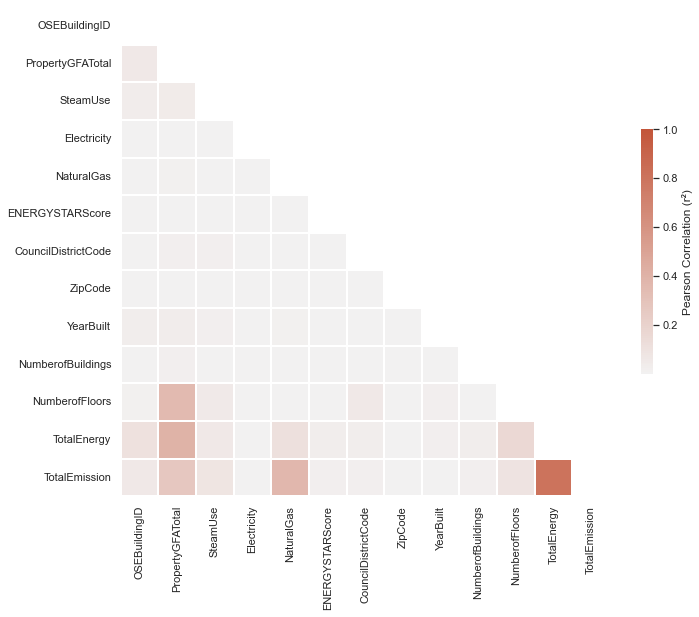

In [112]:
correlation_matrix(df)

## 3.5- A.C.P

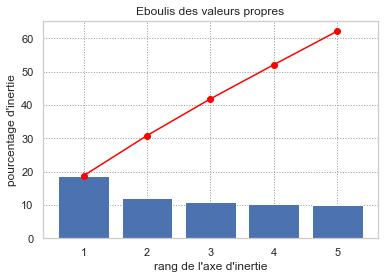

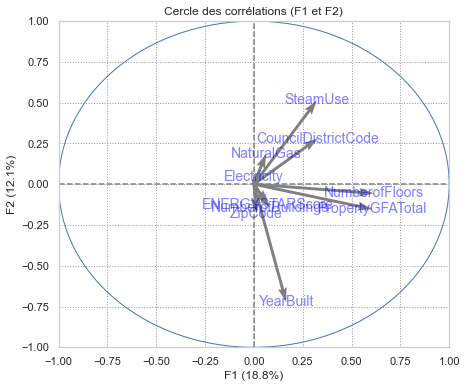

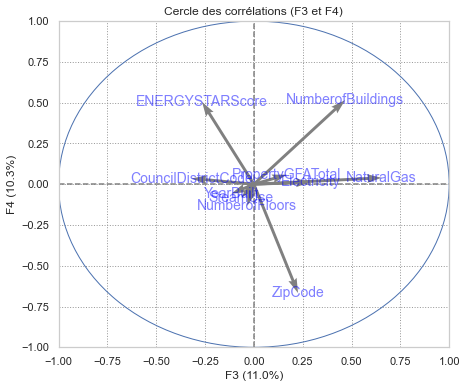

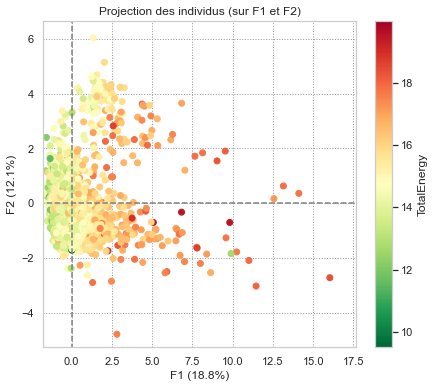

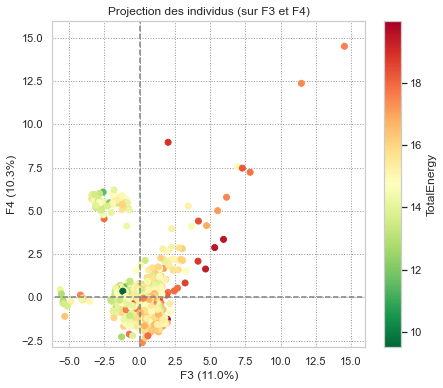

In [113]:
pcs = PCA(df[colsOfType(df[Attributs])], 5, continuous_illustrative_var=df['TotalEnergy'])

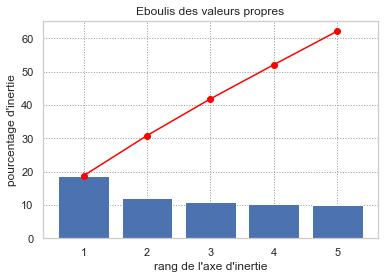

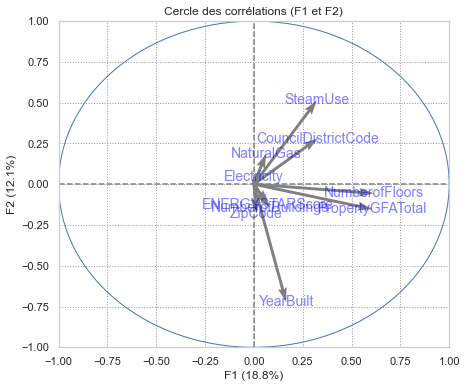

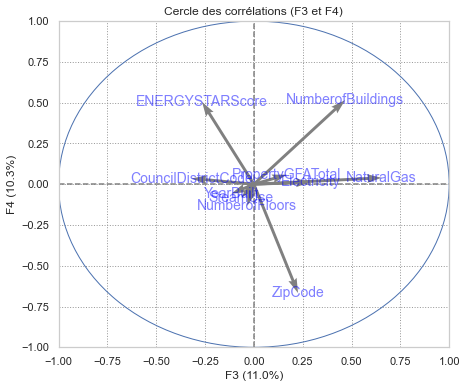

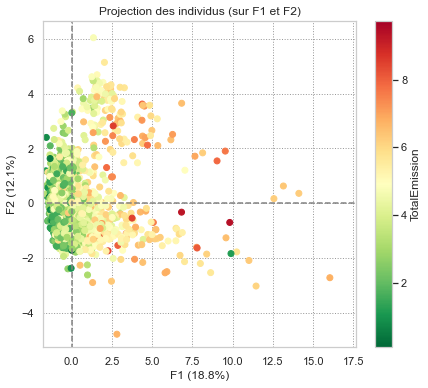

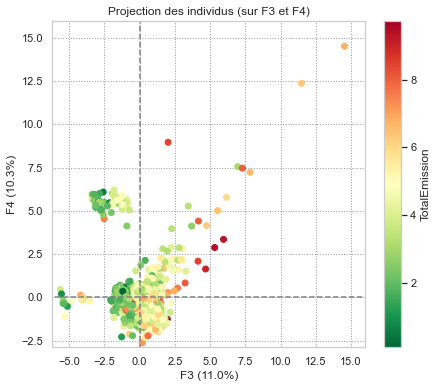

In [114]:
pcs = PCA(df[colsOfType(df[Attributs])], 5, continuous_illustrative_var=df['TotalEmission'])

# 4- Apprentissage

In [115]:
df = df.reset_index(drop=True)
df.to_csv('building-energy-benchmarking.csv')

## 4.2- Modèles de TotalEnergy

### 4.2.1- Construction des Sets

In [116]:
XCols = ['PropertyGFATotal', 'YearBuilt',	'NumberofBuildings', 'NumberofFloors', 'TotalEnergy']
XCols = colsOfType(df)
XCols.remove('TotalEmission')

y = 'TotalEnergy'
X = df[XCols].sort_values(by=[y])

random_state = 0 

X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='robust')

In [117]:
np.array([x for x in set(tuple(x) for x in X_train) & set(tuple(x) for x in X_test)])

array([], dtype=float64)

### 4.2.2- Baseline

modèle de référence

RMSE : 1.19
RMSLE : 0.08
R² : -0.00 RSE : 1.00


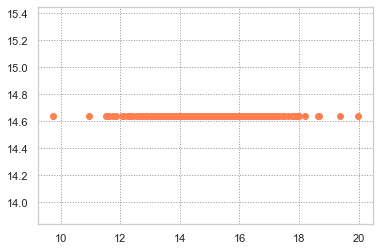

In [118]:
from sklearn import dummy, metrics
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train, y_train)
# Prédiction sur le jeu de test
y_pred = dum.predict(X_test)

# Evaluatation
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')


### 4.2.3- Naive KNN Regressor

RMSE : 0.71
RMSLE : 0.05
R² : 0.64 RSE : 0.36


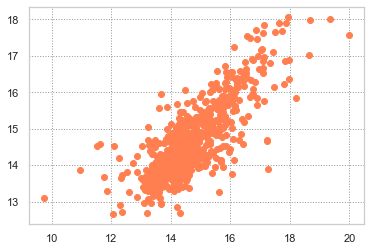

In [119]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## Gram Matrix

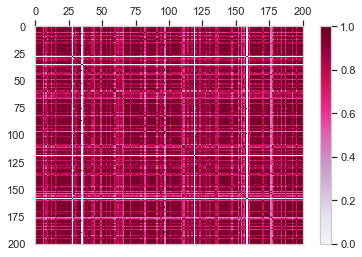

In [120]:
# Gram/K Matrix
from matplotlib import cm
kmatrix = metrics.pairwise.rbf_kernel(X_train, gamma=0.01)

kmatrix = kmatrix[:200, :200]

# dessiner la matrice
plt.pcolor(kmatrix, cmap=cm.PuRd) 

# rajouter la légende
plt.colorbar()

# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()

### CV KNN Regressor

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 12}
RMSE : 0.68
RMSLE : 0.04
R² : 0.67 RSE : 0.33


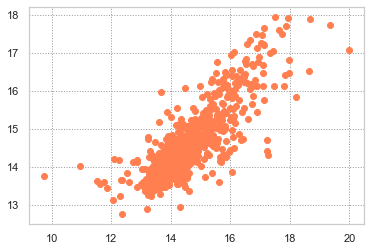

In [121]:
#-------------------------- GridSearchCV --------------------------
from sklearn import neighbors, model_selection

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':list(range(3,21))}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_mean_squared_error'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
regr = model_selection.RandomizedSearchCV(
    neighbors.KNeighborsRegressor(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score,   # score à optimiser
    n_jobs=-1
)

# Optimiser ce classifieur sur le jeu d'entraînement
regr.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(regr.best_params_)

y_pred = regr.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## Kernal Ridge Regressor

RMSE : 0.68
RMSLE : 0.04
R² : 0.67 RSE : 0.33


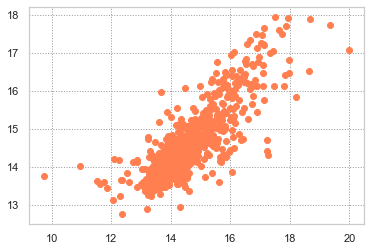

In [122]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## Basic Neural Net Regressor

RMSE : 0.81
RMSLE : 0.05
R² : 0.54 RSE : 0.46


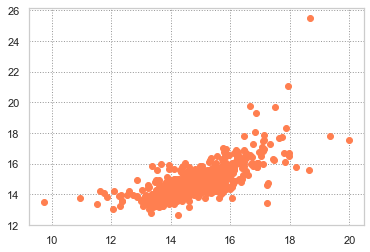

In [123]:
from sklearn.neural_network import MLPRegressor

nnr = MLPRegressor(random_state=1, hidden_layer_sizes=(15, 10, 5,), max_iter=5000)

nnr.fit(X_train, y_train)
y_pred = nnr.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## CV Neural Net Regressor

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'random_state': 3, 'max_iter': 1000, 'hidden_layer_sizes': (15, 10, 5), 'alpha': 1e-06}
RMSE : 0.71
RMSLE : 0.05
R² : 0.65 RSE : 0.35


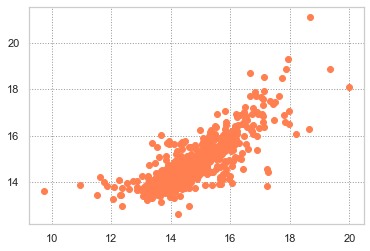

In [124]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'max_iter': np.arange(1000, 3000, 1000), 'alpha': 10.0 ** -np.arange(1, 7), 'random_state':np.arange(4), 'hidden_layer_sizes':[(20, 15, 10, 5,),(15, 10, 5,)]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_mean_squared_log_error'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
regr = model_selection.RandomizedSearchCV(
    MLPRegressor(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score,   # score à optimiser
    n_jobs=-1
)

# Optimiser ce classifieur sur le jeu d'entraînement
regr.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(regr.best_params_)

y_pred = regr.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## Random Forest

RMSE : 0.66
RMSLE : 0.04
R² : 0.69 RSE : 0.31


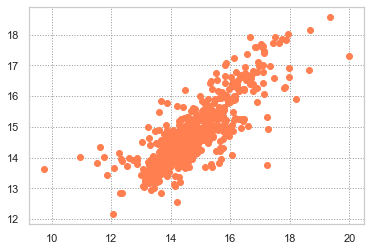

In [125]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0, n_jobs =-1)

model = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

In [126]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(rfc, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

(2715, 10)


In [127]:
import timeit

rfc2 = RandomForestClassifier(n_estimators=500, oob_score=True)

start_time = timeit.default_timer()

rfc2 = rfc2.fit(X_train2, y_train)

X_test2 = select.transform(X_test)



y_pred = rfc.predict(X_test)
elapsed = timeit.default_timer() - start_time

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))

print("time {:.2f}s".format(elapsed))
plt.scatter(y_test, y_pred, color='coral')


NameError: name 'RandomForestClassifier' is not defined